<a href="https://colab.research.google.com/github/Jimin980921/Do-it_DeepLearning/blob/master/Do_it_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Do it 딥러닝 입문 3-1강 실습

In [0]:
#데이터 준비
from sklearn.datasets import load_diabetes
diabetes=load_diabetes()  #diabetes는 Bunch클래스

In [6]:
#diabetes의 속성에 data,target 속성에는 입력과 타깃데이터가 넘파이배열로 저장되어있음. 442행(샘플-환자) 10열(샘플특성-키,몸무게...), 442행 1열
print(diabetes.data.shape,diabetes.target.shape)

(442, 10) (442,)


In [7]:
diabetes.data[0:3]   #입력

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [8]:
diabetes.target[:3]  #타깃

array([151.,  75., 141.])

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51704 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 51704 missing from current font.
  font.set_te

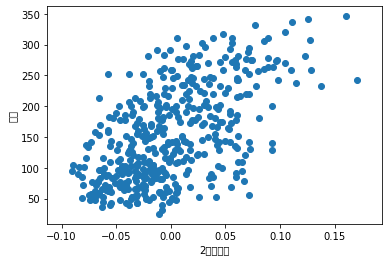

In [9]:
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:,2],diabetes.target) #2번째 특성만 사용해서 그래프 표현
plt.xlabel('2번째특성')
plt.ylabel('환자')
plt.show()

In [0]:
x=diabetes.data[:,2]
y=diabetes.target

## **경사하강법**

In [0]:

#w,b 초기화
w=1.0
b=1.0

In [12]:
y_hat=x[0]*w+b
print(x[0]) #첫번째환자의 2번째 특성
print(y_hat)  # 151과 너무 다름

0.0616962065186885
1.0616962065186886


In [13]:
print(y[0])

151.0


In [14]:
#w값조절해 예측값 바꾸기
w_inc=w+0.1
y_hat_inc=x[0]*w_inc+b
print(y_hat_inc) #151과 너무 다름

1.0678658271705574


In [15]:
#w값 저정한 후, 예측값증가정도 확인하기
w_rate=(y_hat_inc-y_hat)/(w_inc-w)
print(w_rate)  #x[0]와 값이 같음

0.061696206518688734


In [16]:
#가중치 w를 업데이트 하는방법
w_new=w+w_rate
w_new

1.0616962065186888

In [17]:
#변화율로 절편 업데이트
b_inc=b+0.1
y_hat_inc=x[0]*w+b_inc
print(y_hat_inc)

1.1616962065186887


In [19]:
#절편증가율
b_rate=(y_hat_inc-y_hat)/(b_inc-b)
b_rate

1.0

In [20]:
#b의 변화율이 1이기때문에 단순히 1 더하기
b_new=b+1
b_new

2.0

# **오차역전파**
오차 역전파로 가중치와 절편을 더 적절하게 업데이트 가능

오차 역전파: y_hat과 y의 차이를 이용하여 w,b를 업데이트


In [21]:
#1. 오차와 변화율을 곱하여 가중치 업데이트하기
err=y[0]-y_hat
w_new=w+w_rate*err
b_new=b+b_rate*err
print(w_new,b_new)

10.250624555904514 150.9383037934813


In [22]:
#2.w_rate를 x[1]로 갱신
y_hat=x[1]*w_new+b_new
w_rate=x[1]
err=y[1]-y_hat
b_new=b_new+b_rate*err
w_new=w_new+w_rate*err
print(b_new,w_new)

75.52764127612664 14.132317616381767


In [23]:
for x_i,y_i in zip(x,y):   #zip함수는 여러개 배열에서 동시에 요소를 하나씩 꺼내줌.
  y_hat=x_i*w+b
  err=y_i-y_hat
  w_rate=x_i
  w=w+w_rate*err
  b=b+b_rate*err
print(w,b)

587.8654539985689 99.40935564531424


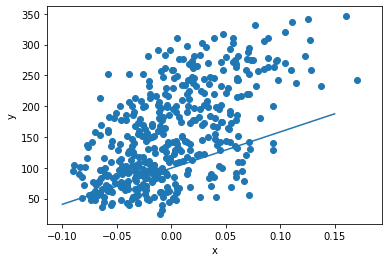

In [29]:
plt.scatter(x,y)
pt1=(-0.1,-0.1*w+b)
pt2=(0.15,0.15*w+b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]])  #?
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [31]:
#여러 에포크 반복하기
for i in range(0,100):
  for x_i,y_i in zip(x,y):
    y_hat=x_i*w+b
    err=y_i-y_hat
    w_rate=x_i
    w=w+w_rate*err
    b=b+b_rate*err
print(w,b)

913.5973364345905 123.39414383177204


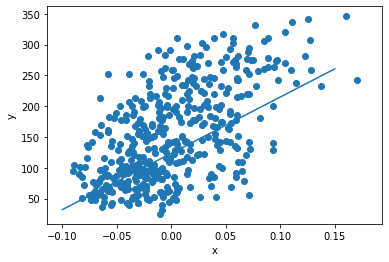

In [32]:
plt.scatter(x,y)
pt1=(-0.1,-0.1*w+b)
pt2=(0.15,0.15*w+b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]])  #?
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [33]:
#모델예측하기
x_new=0.18
y_pred=x_new*w+b
y_pred

287.8416643899983

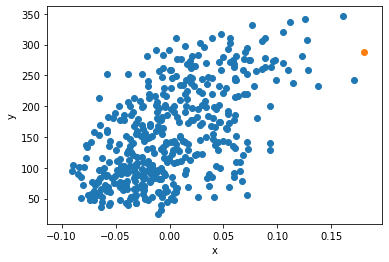

In [34]:
plt.scatter(x,y)
plt.scatter(x_new,y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [0]:
class Neuron:
  def init(self):
    self.w=1.0
    self.b=1.0
  
  def forpass(self,x):
    y_hat=x*self.w+self.b
    return y_hat
  
  def backprop(self,x,err):
    w_grad=x*err
    b_grad=1*err
    return w_grad,b_grad

  def fit(self,x,y,epochs=100):
    for i in range(epochs):
      for x_i,y_i in zip(x,y):
        y_hat=self.forpass(x_i)
        err=y_i-y_hat
        w_grad,b_grad=self.backprop(x_i,err)
        self.w+=w_grad
        self.b+=b_grad


  



In [42]:
  neuron=Neuron()
  neuron.fit(x,y)

AttributeError: ignored